In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
x,y

(tensor([[6., 2.],
         [5., 2.],
         [1., 3.],
         [7., 6.]]),
 tensor([1., 5., 2., 5.]))

In [3]:
M1 = nn.Linear(2,8,bias=False)
M1

Linear(in_features=2, out_features=8, bias=False)

In [4]:
M1(x)

tensor([[ 0.3691, -1.1440, -3.5029,  1.7736, -3.3933, -0.4784, -2.9181, -1.0138],
        [ 0.1171, -0.9329, -3.0645,  1.5814, -2.7319, -0.4255, -2.2483, -1.0486],
        [-1.4624, -0.0273, -1.7467,  1.1230,  0.2011, -0.2940,  0.9809, -1.7994],
        [-1.6647, -1.1100, -5.6857,  3.2069, -2.9047, -0.8527, -1.3869, -3.4246]],
       grad_fn=<MmBackward0>)

In [5]:
M2 = nn.Linear(8,1,bias = False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [6]:
M2(M1(x)).squeeze()

tensor([1.5694, 1.2769, 0.0142, 1.4909], grad_fn=<SqueezeBackward0>)

In [7]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1= nn.Linear(2,8,bias=False)
        self.M2 = nn.Linear(8,1,bias = False)

    def forward(self,x):
        x = self.M1(x)
        x = self.M2(x)
        return x.squeeze() 

In [8]:
model = MyNeuralNetwork()
y_pred = model.forward(x)

In [9]:
for par in model.parameters():
    print(par)

Parameter containing:
tensor([[-0.1513,  0.3438],
        [-0.1580, -0.6909],
        [-0.4381, -0.1887],
        [ 0.1841, -0.0646],
        [ 0.1305, -0.0089],
        [ 0.7038, -0.4646],
        [ 0.2501, -0.3043],
        [ 0.5464,  0.3989]], requires_grad=True)
Parameter containing:
tensor([[-0.3269, -0.0595, -0.2592, -0.2535,  0.0088,  0.2355, -0.0618, -0.2175]],
       requires_grad=True)


In [10]:
y_pred

tensor([ 0.5833,  0.4250, -0.3920,  0.0079], grad_fn=<SqueezeBackward0>)

In [25]:
Loss = nn.MSELoss()
Loss(y,y_pred)

tensor(5.9633, grad_fn=<MseLossBackward0>)

In [33]:
torch.mean((y-y_pred)**2)

tensor(5.9633, grad_fn=<MeanBackward0>)

In [34]:
opt = SGD(model.parameters(),lr = 0.001)

In [45]:
losses = []
for i in range(50):
    opt.zero_grad()#flush previous epoch's gradient
    loss_value = Loss(model(x),y)#compute loss
    loss_value.backward()#compute gradient
    opt.step()#perform iteration using gradient above
    losses.append(loss_value.item())     

Text(0.5, 0, 'epcohs')

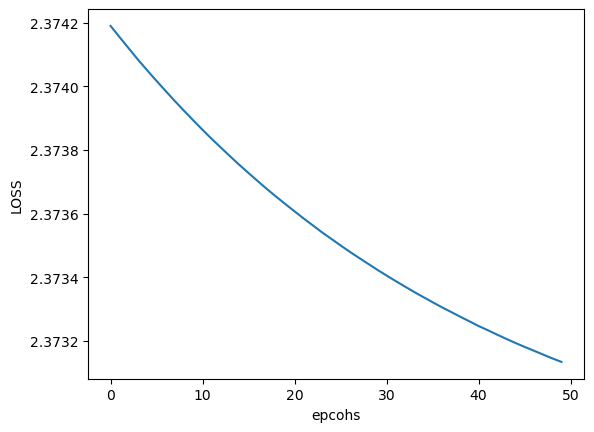

In [46]:
plt.plot(losses)
plt.ylabel("LOSS")
plt.xlabel("epcohs")

In [39]:
model(x)


tensor([3.0301, 2.6657, 1.6302, 5.0823], grad_fn=<SqueezeBackward0>)

In [40]:
y

tensor([1., 5., 2., 5.])